# Imports

In [60]:
# my module
import acquire as aq

# other imports
import pandas as pd
import requests
import math
import os

# Acquire

**Setup**
* url (base + endpoint)
* empty list
Loop
* make a request
* handle the response, add to the list
* find the next url endpoint
    * if it's None, stop looping
    * if it's a string, use it to construct the next url
* Turn the list into a dataframe

# 1. Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named people that has all of the data for people.

In [49]:
ppl_df = aq.star_wars('people/', 'results')
ppl_df.head()

Query Completed for People...
CSV File Found, Loading...


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],"['https://swapi.dev/api/vehicles/14/', 'https:...","['https://swapi.dev/api/starships/12/', 'https...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,"['https://swapi.dev/api/films/1/', 'https://sw...",['https://swapi.dev/api/species/2/'],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],[],['https://swapi.dev/api/starships/13/'],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"['https://swapi.dev/api/films/1/', 'https://sw...",[],['https://swapi.dev/api/vehicles/30/'],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/


# 2. Do the same thing, but for planets.

In [50]:
plt_df = aq.star_wars('planets/', 'results')
plt_df.head()

Query Completed for Planets...
CSV Not Found, Writing Data to CSV...
Data Found, Identifying Range...
Number of Planets: 60
        Next Page: https://swapi.dev/api/planets/?page=2
        Previous Page: None
Number of Results Per Page: 10
        Max Pages: 6
Creating DF Results...
Iterating through pages to gather all applicable results...


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/
3,Hoth,23,549,7200,frozen,1.1 standard,"tundra, ice caves, mountain ranges",100,unknown,[],[https://swapi.dev/api/films/2/],2014-12-10T11:39:13.934000Z,2014-12-20T20:58:18.423000Z,https://swapi.dev/api/planets/4/
4,Dagobah,23,341,8900,murky,N/A,"swamp, jungles",8,unknown,[],"[https://swapi.dev/api/films/2/, https://swapi...",2014-12-10T11:42:22.590000Z,2014-12-20T20:58:18.425000Z,https://swapi.dev/api/planets/5/


# 3. Extract the data for starships.

In [51]:
ship_df = aq.star_wars('starships/', 'results')
ship_df.head()

Query Completed for Starships...
CSV Not Found, Writing Data to CSV...
Data Found, Identifying Range...
Number of Starships: 36
        Next Page: https://swapi.dev/api/starships/?page=2
        Previous Page: None
Number of Results Per Page: 10
        Max Pages: 4
Creating DF Results...
Iterating through pages to gather all applicable results...


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/
3,Death Star,DS-1 Orbital Battle Station,"Imperial Department of Military Research, Sien...",1000000000000,120000,n/a,"342,953","843,342",1000000000000,3 years,4.0,10,Deep Space Mobile Battlestation,[],[https://swapi.dev/api/films/1/],2014-12-10T16:36:50.509000Z,2014-12-20T21:26:24.783000Z,https://swapi.dev/api/starships/9/
4,Millennium Falcon,YT-1300 light freighter,Corellian Engineering Corporation,100000,34.37,1050,4,6,100000,2 months,0.5,75,Light freighter,"[https://swapi.dev/api/people/13/, https://swa...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T16:59:45.094000Z,2014-12-20T21:23:49.880000Z,https://swapi.dev/api/starships/10/


# 4. Save the data in your files to local csv files so that it will be faster to access in the future.

In [52]:
# In the function!

# 5. Combine the data from your three separate dataframes into one large dataframe.

In [55]:
all_in_one_df = pd.concat([ppl_df, plt_df, ship_df]).reset_index()
all_in_one_df

,index,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,...,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots
0,0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,C-3PO,167,75,NaN,gold,yellow,112BBY,NaN,https://swapi.dev/api/planets/1/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,R2-D2,96,32,NaN,"white, blue",red,33BBY,NaN,https://swapi.dev/api/planets/8/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,31,Jedi Interceptor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.47,1500,1,0,60,2 days,1.0,unknown,starfighter,"[https://swapi.dev/api/people/10/, https://swa..."
174,32,arc-170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.5,1000,3,0,110,5 days,1.0,100,starfighter,[]
175,33,Banking clan frigte,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,825,unknown,200,unknown,40000000,2 years,1.0,unknown,cruiser,[]
176,34,Belbullab-22 starfighter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.71,1100,1,0,140,7 days,6,unknown,starfighter,"[https://swapi.dev/api/people/10/, https://swa..."


# 6. Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [58]:
germany = pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
germany = germany.set_index('Date').sort_index()
germany.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

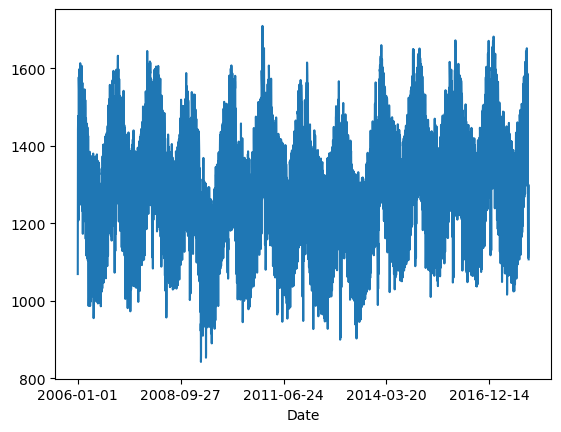

In [59]:
germany.Consumption.plot()

# Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the acquire.py file and be able to re-run the functions and get the same data.